# PLOTAGEM DOS GRÁFICOS

In [1]:
from pandas import read_excel, to_datetime, Series
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
from matplotlib.ticker import StrMethodFormatter

# Carregando a planilha
path = r"C:\Users\Jean Nery\OneDrive\Documentos\Faculdade\9º PERÍODO\ANÁLISE PREDITIVA\25.04.22.Dados.xlsx"
path_graphics = r"C:\Users\Jean Nery\OneDrive\Documentos\Faculdade\9º PERÍODO\ANÁLISE PREDITIVA\Gráficos"
df = read_excel(path, sheet_name="2025.04.22")

# Convertendo a coluna de data e organizando a série temporal
df['Timestamp'] = to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Frequência diária
serie = df['Camisetas_básicas_masculinas'].asfreq('D')

# Decomposição aditiva
decomposicao = sm.tsa.seasonal_decompose(serie, model='additive', period=30)

# Plotando os componentes: nível, tendência, sazonalidade e ruído
plt.figure(figsize=(12, 8))
decomposicao.plot()
plt.suptitle('Decomposição da Série Temporal - Vendas Diárias de Camisetas', fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(path_graphics, "decomposicao_series_temporais.png"))
plt.close()

# Plotando gráfico mensal
vendas_mensais = serie.resample('ME').sum() # agrupamento por mês

fig, ax = plt.subplots(figsize=(12, 6)) # criação do gráfico
barras = ax.bar(vendas_mensais.index.strftime('%b\n%Y'), vendas_mensais.values, color='white', edgecolor='black')
ax.set_facecolor('#2c2c2c')
fig.patch.set_facecolor('#2c2c2c')
ax.set_title('Volume de Vendas por Mês', fontsize=16, color='white')
ax.set_ylabel('Volumes Vendidos', color='white')

z = Series(vendas_mensais.values) # linha de tendência
coef = Series(range(len(z)))
ajuste = Series(Series(z).rolling(window=3, min_periods=1).mean())
ax.plot(vendas_mensais.index.strftime('%b\n%Y'), ajuste, color='orange', linewidth=2)

ax.tick_params(colors='white') # estética
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Salvar
plt.tight_layout()
plt.savefig(os.path.join(path_graphics, "grafico_mensal_vendas.png"))
plt.close()

<Figure size 1200x800 with 0 Axes>

# PREPARAÇÃO DOS DADOS

In [2]:
from pandas import read_excel

# Carregando a planilha
path2 = r"C:\Users\Jean Nery\OneDrive\Documentos\Faculdade\9º PERÍODO\ANÁLISE PREDITIVA\25.04.22.Dados.xlsx"
df2 = read_excel(path2, sheet_name="2025.04.22")

# 1. Verificar se existem linhas com valores faltantes
linhas_faltantes = df2[df2.isnull().any(axis=1)]

if linhas_faltantes.empty:
    print("✅ Todas as linhas estão completamente preenchidas.")
else:
    print("⚠️ Existem linhas com valores ausentes:")
    print(linhas_faltantes)

# 2. Verificar duplicatas na coluna de data
coluna_data = 'Timestamp' 
duplicatas_data = df2[df2.duplicated(subset=coluna_data, keep=False)]

if duplicatas_data.empty:
    print("✅ Não há valores repetidos na coluna de data.")
else:
    print("⚠️ Há valores repetidos na coluna de data:")
    print(duplicatas_data)

✅ Todas as linhas estão completamente preenchidas.
✅ Não há valores repetidos na coluna de data.


# MODELAGEM DOS DADOS


### Previsões para Novembro e Dezembro de 2024 ###

Previsões para Novembro/2024:
            Naive  Cumulativo  Média Móvel  Suavização Exp.
2024-11-01    412  208.289855   414.533333        396.74864
2024-11-02    412  208.289855   415.251111        396.74864
2024-11-03    412  208.289855   416.059481        396.74864
2024-11-04    412  208.289855   416.761464        396.74864
2024-11-05    412  208.289855   416.586846        396.74864
2024-11-06    412  208.289855   417.039741        396.74864
2024-11-07    412  208.289855   417.374399        396.74864
2024-11-08    412  208.289855   418.020213        396.74864
2024-11-09    412  208.289855   418.620886        396.74864
2024-11-10    412  208.289855   419.408249        396.74864
2024-11-11    412  208.289855   414.455191        396.74864
2024-11-12    412  208.289855   406.237031        396.74864
2024-11-13    412  208.289855   400.544932        396.74864
2024-11-14    412  208.289855   401.129763        396.74864
2024-11-15    412

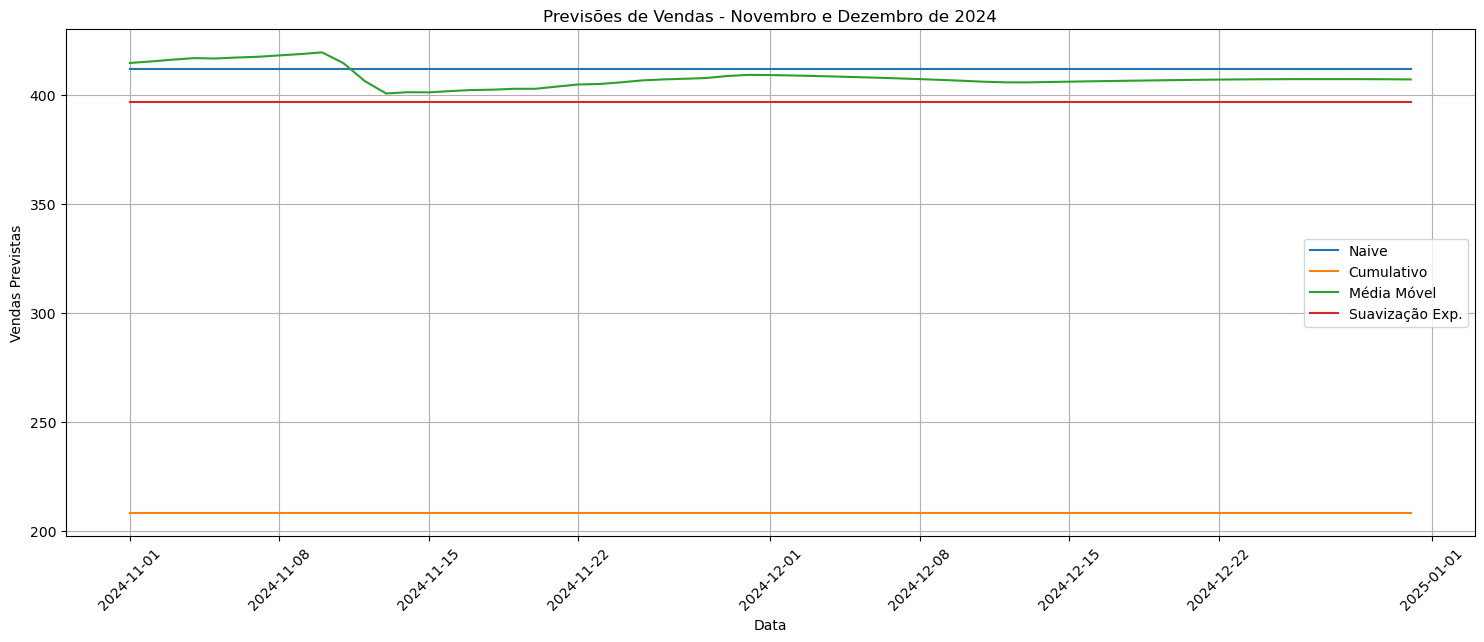

In [8]:
from pandas import read_excel, to_datetime, date_range, Series, DataFrame
import matplotlib.pyplot as plt

# Carregando os dados
path3 = r"C:\Users\Jean Nery\OneDrive\Documentos\Faculdade\9º PERÍODO\ANÁLISE PREDITIVA\25.04.22.Dados.xlsx"
df3 = read_excel(path3, sheet_name="2025.04.22")

# Garantindo que a coluna de data está no formato datetime
df3['Timestamp'] = to_datetime(df3['Timestamp'])

# Ordenando as datas
df3 = df3.sort_values('Timestamp')

# Definindo índice para cada coluna
df3.set_index('Timestamp', inplace=True)

# Separando os dados até outubro de 2024 (novembro como mês de treino)
df_treino = df3[df3.index < '2024-11-01']

# Gerando as datas de previsão (nov e dez)
datas_previstas = date_range(start="2024-11-01", end="2024-12-31", freq='D')

print("\n### Previsões para Novembro e Dezembro de 2024 ###")

# === Modelo Naive ===
ultimo_valor = df_treino['Camisetas_básicas_masculinas'].iloc[-1]
previsao_naive = Series(ultimo_valor, index=datas_previstas)


# === Modelo Cumulativo ===
media_diaria_total = df_treino['Camisetas_básicas_masculinas'].mean()
previsao_cumulativa = Series(media_diaria_total, index=datas_previstas)


# === Média Móvel (janela de k dias) ===
k = 30
serie_extendida = df_treino['Camisetas_básicas_masculinas'].copy().astype(float)
previsoes_mm = []

for Timestamp in datas_previstas:
    media_movel = serie_extendida.iloc[-k:].mean()
    previsoes_mm.append(media_movel)
    serie_extendida.loc[Timestamp] = media_movel
    
previsao_mm = Series(previsoes_mm, index=datas_previstas)


# === 4. Suavização Exponencial ===
alpha = 0.3
serie_exp_real = df_treino['Camisetas_básicas_masculinas'].copy().astype(float)
S_anterior = serie_exp_real.ewm(alpha=alpha, adjust=False).mean().iloc[-1]  # último valor suavizado real

previsoes_exp_dinamica = []

for Timestamp in datas_previstas:
    S_novo = alpha * S_anterior + (1 - alpha) * S_anterior  # equivalente a manter suavização com input previsto
    previsoes_exp_dinamica.append(S_novo)
    S_anterior = S_novo  # atualiza suavizado

previsao_exp_dinamica = Series(previsoes_exp_dinamica, index=datas_previstas)

# Organizando tudo em um dataFrame
df_previsoes = DataFrame({
    'Naive': previsao_naive,
    'Cumulativo': previsao_cumulativa,
    'Média Móvel': previsao_mm,
    'Suavização Exp.': previsao_exp_dinamica
})

# Exibir as previsões completas de novembro e dezembro
print("\nPrevisões para Novembro/2024:")
print(df_previsoes.head(30))

print("\nPrevisões para Dezembro/2024:")
print(df_previsoes.tail(31))

# Plotando os gráficos
plt.figure(figsize=(15, 6))
for coluna in df_previsoes.columns:
    plt.plot(df_previsoes.index, df_previsoes[coluna], label=coluna)

plt.title("Previsões de Vendas - Novembro e Dezembro de 2024")
plt.xlabel("Data")
plt.ylabel("Vendas Previstas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

#df_previsoes.to_excel("previsoes_nov_dez_2024.xlsx")

### FUNDAMENTAÇÃO TEÓRICA

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Seleciona os dados reais de novembro
reais_novembro = df3.loc['2024-11-01':'2024-11-30', 'Camisetas_básicas_masculinas']

# Inicializa um dicionário para armazenar os erros
erros_modelos = {}

for modelo in df_previsoes.columns:
    previsoes = df_previsoes.loc['2024-11-01':'2024-11-30', modelo]
    
    # Alinha os índices
    previsoes = previsoes.loc[reais_novembro.index]
    
    # Cálculo das métricas
    mad = mean_absolute_error(reais_novembro, previsoes)  # MAD
    rmse = mean_squared_error(reais_novembro, previsoes, squared=False)  # RMSE
    mape = np.mean(np.abs((reais_novembro - previsoes) / reais_novembro)) * 100  # MAPE
    
    erros_modelos[modelo] = {
        'MAD': mad,
        'RMSE': rmse,
        'MAPE (%)': mape
    }

# Exibindo resultados
print("\n### Erros de Previsão - Novembro 2024 ###")
for modelo, erros in erros_modelos.items():
    print(f"\nModelo: {modelo}")
    for nome_erro, valor in erros.items():
        print(f"{nome_erro}: {valor:.2f}")